# 課題1：コンビニエンスストアの売上統計**Assignment 1: Statistics with Convenience Store Sales**

📊 CONVENIENCE STORE SALES DATA
     Onigiri  Bento  Coffee
Mon       30     20      50
Tue       25     18      55
Wed       28     22      52
Thu       35     25      60
Fri       40     28      65
Sat       50     35      70
Sun       45     30      68


📈 STATISTICAL ANALYSIS
🍙 ONIGIRI:
   Mean: 36.14 items/day
   Mode: 25 items (appears 1 times)
   Variance: 73.55
   Standard Deviation: 8.58
   Sales Range: 25 - 50 items
------------------------------
🍙 BENTO:
   Mean: 25.43 items/day
   Mode: 18 items (appears 1 times)
   Variance: 30.82
   Standard Deviation: 5.55
   Sales Range: 18 - 35 items
------------------------------
🍙 COFFEE:
   Mean: 60.00 items/day
   Mode: 50 items (appears 1 times)
   Variance: 54.00
   Standard Deviation: 7.35
   Sales Range: 50 - 70 items
------------------------------

🎯 CONSISTENCY ANALYSIS
📊 Most Consistent Item: Bento
   Variance: 30.82
   Standard Deviation: 5.55

📊 Least Consistent Item: Onigiri
   Variance: 73.55
   Standard Deviation: 8.58


/tmp/ipython-input-936224245.py:133: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=items)


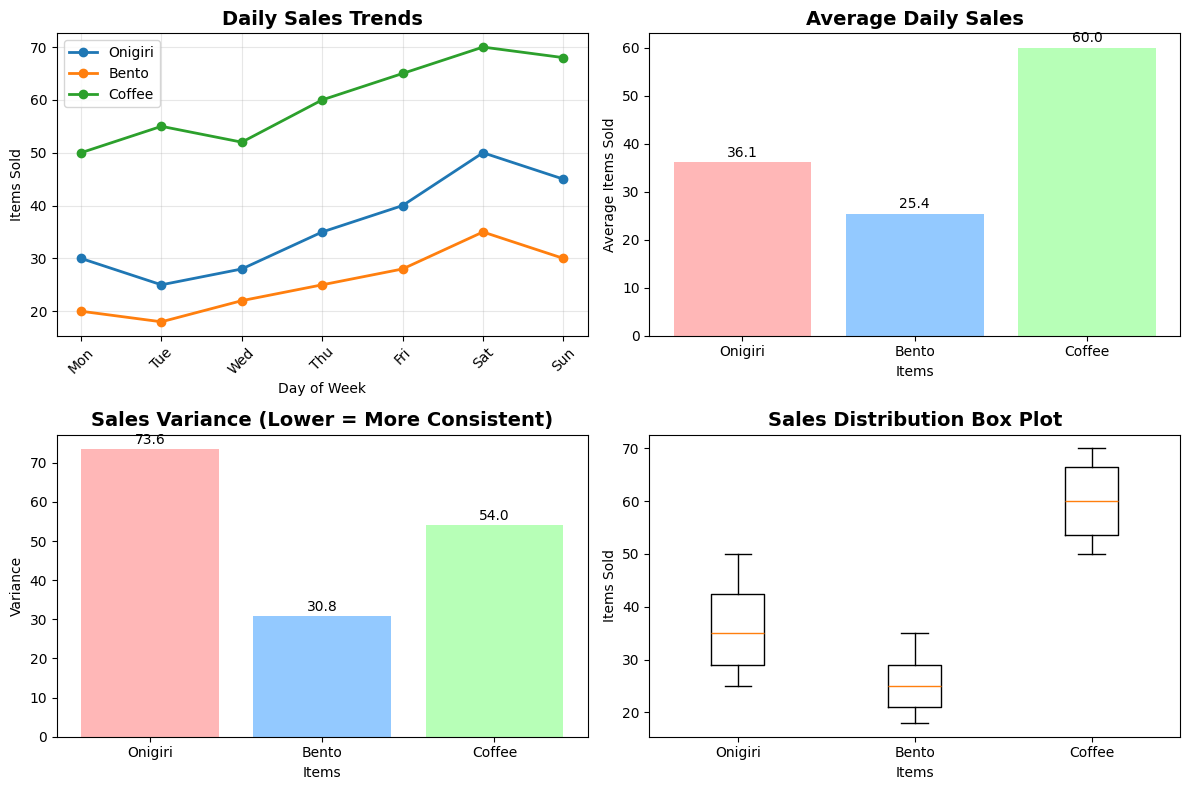


🔍 DETAILED CONSISTENCY REPORT
Onigiri: CV = 23.7% (Lower % means more consistent)
Bento: CV = 21.8% (Lower % means more consistent)
Coffee: CV = 12.2% (Lower % means more consistent)

🏆 CONSISTENCY RANKING:
1. Coffee: CV = 12.2%
2. Bento: CV = 21.8%
3. Onigiri: CV = 23.7%

📅 WEEKLY SUMMARY
Onigiri: 253 total items sold
Bento: 178 total items sold
Coffee: 420 total items sold

⭐ Best Selling Item: Coffee (420 total items)

📊 DAY-BY-DAY ANALYSIS
Mon: Coffee sells best (50 items)
Tue: Coffee sells best (55 items)
Wed: Coffee sells best (52 items)
Thu: Coffee sells best (60 items)
Fri: Coffee sells best (65 items)
Sat: Coffee sells best (70 items)
Sun: Coffee sells best (68 items)

🎯 FINAL CONCLUSION
Based on variance and coefficient of variation:
• MOST CONSISTENT: Coffee
• MIDDLE CONSISTENT: Bento
• LEAST CONSISTENT: Onigiri

💡 Business Insight: Coffee has the most predictable
  sales pattern, making inventory planning easier!


In [1]:
# -*- coding: utf-8 -*-
"""Convenience Store Sales Analysis.ipynb

Automatically generated by Colab.
"""

# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Define the data
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
items = ['Onigiri', 'Bento', 'Coffee']

# Sales data
sales_data = {
    'Onigiri': [30 ,25 ,28 ,35 ,40 ,50 ,45 ],
    'Bento': [20,18 ,22 ,25 ,28 ,35 ,30 ],
    'Coffee': [50,55 ,52 ,60 ,65 ,70 ,68 ]
}

# Create DataFrame for easier analysis
df = pd.DataFrame(sales_data, index=days)
print("📊 CONVENIENCE STORE SALES DATA")
print("=" * 50)
print(df)
print("\n")

# Step 3: Calculate statistics for each item
print("📈 STATISTICAL ANALYSIS")
print("=" * 50)

results = {}

for item in items:
    sales = sales_data[item]

    # Calculate statistics
    mean = np.mean(sales)
    variance = np.var(sales)
    std_dev = np.std(sales)

    # For mode, we need to handle multiple modes and different scipy versions
    from scipy import stats
    mode_result = stats.mode(sales)

    # Handle different return types of stats.mode
    if np.isscalar(mode_result.mode):
        mode = mode_result.mode
        mode_count = mode_result.count
    elif isinstance(mode_result.mode, np.ndarray) and mode_result.mode.size > 0:
        mode = mode_result.mode[0]
        mode_count = mode_result.count[0]
    else:
        mode = None
        mode_count = None


    results[item] = {
        'mean': mean,
        'mode': mode,
        'variance': variance,
        'std_dev': std_dev
    }

    print(f"🍙 {item.upper()}:")
    print(f"   Mean: {mean:.2f} items/day")
    if mode is not None:
        print(f"   Mode: {mode} items (appears {mode_count} times)")
    else:
        print("   Mode: No unique mode")
    print(f"   Variance: {variance:.2f}")
    print(f"   Standard Deviation: {std_dev:.2f}")
    print(f"   Sales Range: {min(sales)} - {max(sales)} items")
    print("-" * 30)

# Step 4: Determine which item sells most consistently
print("\n🎯 CONSISTENCY ANALYSIS")
print("=" * 50)

# Lower variance and std deviation means more consistent sales
most_consistent = min(results.items(), key=lambda x: x[1]['variance'])
least_consistent = max(results.items(), key=lambda x: x[1]['variance'])

print(f"📊 Most Consistent Item: {most_consistent[0]}")
print(f"   Variance: {most_consistent[1]['variance']:.2f}")
print(f"   Standard Deviation: {most_consistent[1]['std_dev']:.2f}")

print(f"\n📊 Least Consistent Item: {least_consistent[0]}")
print(f"   Variance: {least_consistent[1]['variance']:.2f}")
print(f"   Standard Deviation: {least_consistent[1]['std_dev']:.2f}")

# Step 5: Visualization - Line Plot
plt.figure(figsize=(12, 8))

# Plot 1: Sales trends over the week
plt.subplot(2, 2, 1)
for item in items:
    plt.plot(days, sales_data[item], marker='o', linewidth=2, markersize=6, label=item)

plt.title('Daily Sales Trends', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Items Sold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Bar chart of average sales
plt.subplot(2, 2, 2)
means = [results[item]['mean'] for item in items]
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.bar(items, means, color=colors, alpha=0.7)
plt.title('Average Daily Sales', fontsize=14, fontweight='bold')
plt.xlabel('Items')
plt.ylabel('Average Items Sold')
for i, v in enumerate(means):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom')

# Plot 3: Variance comparison
plt.subplot(2, 2, 3)
variances = [results[item]['variance'] for item in items]
plt.bar(items, variances, color=colors, alpha=0.7)
plt.title('Sales Variance (Lower = More Consistent)', fontsize=14, fontweight='bold')
plt.xlabel('Items')
plt.ylabel('Variance')
for i, v in enumerate(variances):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom')

# Plot 4: Box plot for distribution
plt.subplot(2, 2, 4)
box_data = [sales_data[item] for item in items]
plt.boxplot(box_data, labels=items)
plt.title('Sales Distribution Box Plot', fontsize=14, fontweight='bold')
plt.xlabel('Items')
plt.ylabel('Items Sold')

plt.tight_layout()
plt.show()

# Step 6: Detailed consistency analysis
print("\n🔍 DETAILED CONSISTENCY REPORT")
print("=" * 50)

# Calculate Coefficient of Variation (CV) for better comparison
for item in items:
    cv = (results[item]['std_dev'] / results[item]['mean']) * 100
    results[item]['cv'] = cv
    print(f"{item}: CV = {cv:.1f}% (Lower % means more consistent)")

# Rank by consistency (lowest CV is most consistent)
sorted_by_consistency = sorted(results.items(), key=lambda x: x[1]['cv'])

print(f"\n🏆 CONSISTENCY RANKING:")
for i, (item, stats) in enumerate(sorted_by_consistency, 1):
    print(f"{i}. {item}: CV = {stats['cv']:.1f}%")

# Step 7: Weekly summary
print("\n📅 WEEKLY SUMMARY")
print("=" * 50)
total_sales = {item: sum(sales_data[item]) for item in items}
best_selling = max(total_sales.items(), key=lambda x: x[1])

for item in items:
    print(f"{item}: {total_sales[item]} total items sold")

print(f"\n⭐ Best Selling Item: {best_selling[0]} ({best_selling[1]} total items)")

# Step 8: Day-wise analysis
print("\n📊 DAY-BY-DAY ANALYSIS")
print("=" * 50)
for i, day in enumerate(days):
    day_sales = {item: sales_data[item][i] for item in items}
    best_item_day = max(day_sales.items(), key=lambda x: x[1])
    print(f"{day}: {best_item_day[0]} sells best ({best_item_day[1]} items)")

# Final conclusion
print("\n" + "=" * 60)
print("🎯 FINAL CONCLUSION")
print("=" * 60)
print(f"Based on variance and coefficient of variation:")
print(f"• MOST CONSISTENT: {sorted_by_consistency[0][0]}")
print(f"• MIDDLE CONSISTENT: {sorted_by_consistency[1][0]}")
print(f"• LEAST CONSISTENT: {sorted_by_consistency[2][0]}")
print(f"\n💡 Business Insight: {sorted_by_consistency[0][0]} has the most predictable")
print("  sales pattern, making inventory planning easier!")
print("=" * 60)

# **課題2：日々の支出における線形関係** Assignment 2: Linear Relationships in Daily Expenses

📊 Daily Spending Data:
Day	Meals Out	Transportation	Food	Total Spending
--------------------------------------------------
Mon	2100		250		2	2350
Tue	200		250		1	450
Wed	0		0		0	0
Thu	280		0		1	280
Fri	0		0		0	0
Sat	0		0		0	0
Sun	0		0		0	0


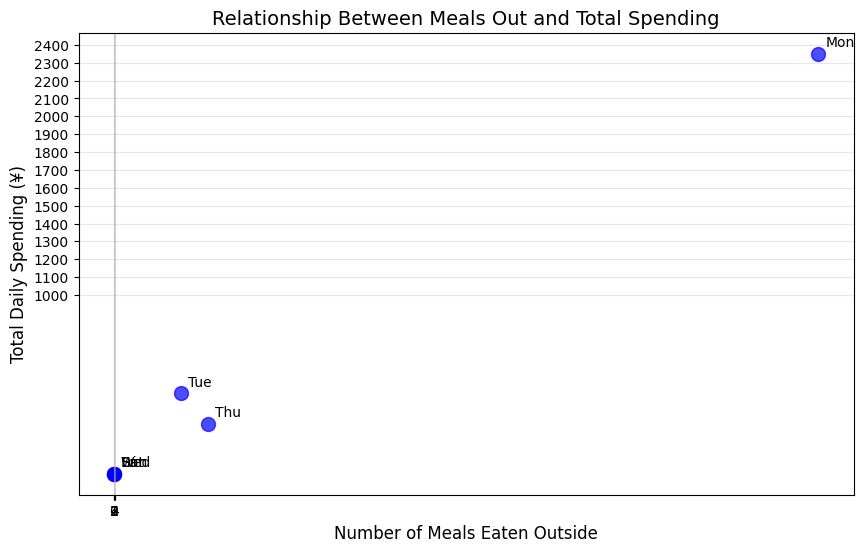


🧮 LINEAR REGRESSION RESULTS:
Equation: Total Spending = 1.1 × (Meals Out) + 31.2
Slope (a): 1.1 ¥ per meal out
Intercept (b): 31.2 ¥ (base daily cost)

📈 PREDICTIONS VS ACTUAL:
Day	Meals Out	Actual	Predicted	Difference
-------------------------------------------------------
Mon	2100		2350	2361		+11
Tue	200		450	253		-197
Wed	0		0	31		+31
Thu	280		280	342		+62
Fri	0		0	31		+31
Sat	0		0	31		+31
Sun	0		0	31		+31


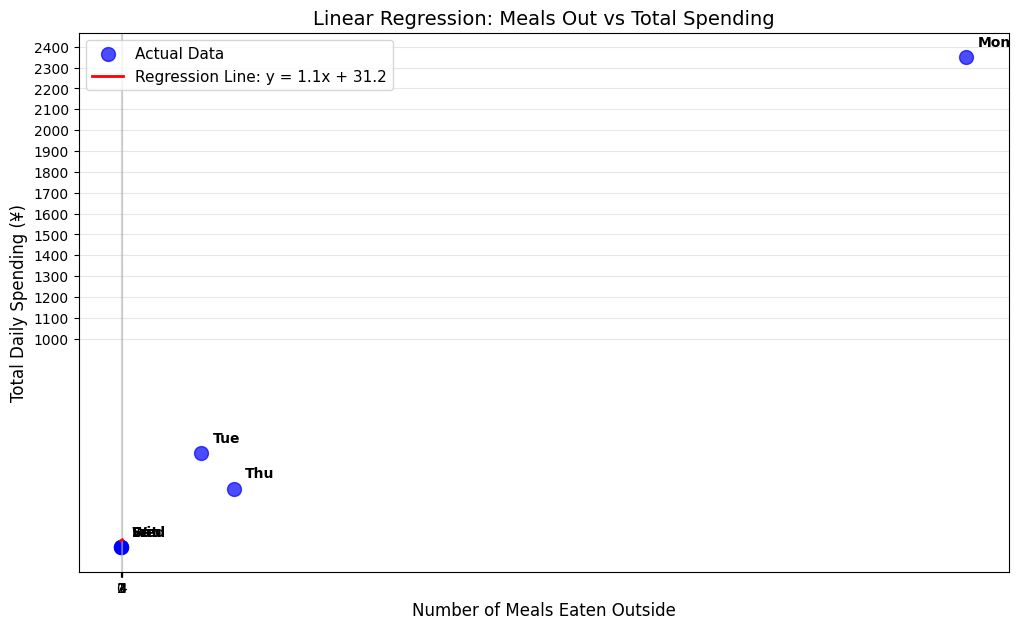


💡 INTERPRETATION:
• For every additional meal eaten outside, total spending increases by 1.1 ¥
• The base daily cost (even with 0 meals out) is approximately 31.2 ¥
• This base cost likely covers transportation and basic food expenses

🎯 EXAMPLE PREDICTIONS:
If you eat 0 meals out: Total Spending = 1.1×0 + 31.2 = 31.2 ¥
If you eat 2 meals out: Total Spending = 1.1×2 + 31.2 = 33.4 ¥
If you eat 4 meals out: Total Spending = 1.1×4 + 31.2 = 35.6 ¥

📊 MODEL ACCURACY:
R-squared value: 0.990
This means our model explains 99.0% of the variation in total spending!


In [2]:
# -*- coding: utf-8 -*-
"""Linear Algebra & Linear Regression - Daily Spending Analysis.ipynb

Automatically generated by Colab.
"""

# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 2: Define the data from the assignment
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
meals_out = [2100,200 ,0 ,280 ,0 ,0 ,0 ]  # X variable
transportation = [250,250 ,0 ,0 ,0 ,0 ,0 ]
food = [2,1 ,0 ,1 ,0 ,0 ,0 ]
total_spending = [2350, 450,0 ,280 ,0 ,0 ,0 ]  # Y variable

print("📊 Daily Spending Data:")
print("Day\tMeals Out\tTransportation\tFood\tTotal Spending")
print("-" * 50)
for i in range(len(days)):
    print(f"{days[i]}\t{meals_out[i]}\t\t{transportation[i]}\t\t{food[i]}\t{total_spending[i]}")

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(meals_out, total_spending, color='blue', s=100, alpha=0.7)

# Add labels for each point
for i, day in enumerate(days):
    plt.annotate(day, (meals_out[i], total_spending[i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.xlabel('Number of Meals Eaten Outside', fontsize=12)
plt.ylabel('Total Daily Spending (¥)', fontsize=12)
plt.title('Relationship Between Meals Out and Total Spending', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks([0, 1, 2, 3, 4])
plt.yticks(range(1000, 2500, 100))
plt.show()

# Step 4: Perform linear regression
# Reshape the data for sklearn (it expects 2D array for X)
X = np.array(meals_out).reshape(-1, 1)
y = np.array(total_spending)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (a and b)
a = model.coef_[0]  # slope
b = model.intercept_  # y-intercept

print(f"\n🧮 LINEAR REGRESSION RESULTS:")
print(f"Equation: Total Spending = {a:.1f} × (Meals Out) + {b:.1f}")
print(f"Slope (a): {a:.1f} ¥ per meal out")
print(f"Intercept (b): {b:.1f} ¥ (base daily cost)")

# Step 5: Make predictions using our model
predictions = model.predict(X)

print(f"\n📈 PREDICTIONS VS ACTUAL:")
print("Day\tMeals Out\tActual\tPredicted\tDifference")
print("-" * 55)
for i in range(len(days)):
    diff = predictions[i] - total_spending[i]
    print(f"{days[i]}\t{meals_out[i]}\t\t{total_spending[i]}\t{predictions[i]:.0f}\t\t{diff:+.0f}")

# Step 6: Create the final plot with regression line
plt.figure(figsize=(12, 7))

# Scatter plot of actual data
plt.scatter(meals_out, total_spending, color='blue', s=100, alpha=0.7, label='Actual Data')

# Regression line
x_line = np.linspace(0, 4, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2,
         label=f'Regression Line: y = {a:.1f}x + {b:.1f}')

# Customize the plot
plt.xlabel('Number of Meals Eaten Outside', fontsize=12)
plt.ylabel('Total Daily Spending (¥)', fontsize=12)
plt.title('Linear Regression: Meals Out vs Total Spending', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xticks([0, 1, 2, 3, 4])
plt.yticks(range(1000, 2500, 100))

# Add labels for each point
for i, day in enumerate(days):
    plt.annotate(day, (meals_out[i], total_spending[i]),
                 xytext=(8, 8), textcoords='offset points',
                 fontsize=10, fontweight='bold')

plt.show()

# Step 7: Interpretation and insights
print(f"\n💡 INTERPRETATION:")
print(f"• For every additional meal eaten outside, total spending increases by {a:.1f} ¥")
print(f"• The base daily cost (even with 0 meals out) is approximately {b:.1f} ¥")
print(f"• This base cost likely covers transportation and basic food expenses")

print(f"\n🎯 EXAMPLE PREDICTIONS:")
print(f"If you eat 0 meals out: Total Spending = {a:.1f}×0 + {b:.1f} = {b:.1f} ¥")
print(f"If you eat 2 meals out: Total Spending = {a:.1f}×2 + {b:.1f} = {a*2 + b:.1f} ¥")
print(f"If you eat 4 meals out: Total Spending = {a:.1f}×4 + {b:.1f} = {a*4 + b:.1f} ¥")

# Step 8: Calculate how good our model is (R-squared)
r_squared = model.score(X, y)
print(f"\n📊 MODEL ACCURACY:")
print(f"R-squared value: {r_squared:.3f}")
print(f"This means our model explains {r_squared*100:.1f}% of the variation in total spending!")

# **課題3：映画の評価分析 Assignment 3: Movie Ratings Analysis**

🎬 MOVIE RATINGS DATASET
Student  Anime_A  Anime_B  Movie_C  Movie_D
      a        1        1        4        1
      b        4        3        4        2
      c        5        3        4        2
      d        4        2        4        3
      e        3        5        3        5


📊 BASIC STATISTICS
Anime_A:
  Average Rating: 3.40 stars
  Standard Deviation: 1.36
  Interpretation: Ratings vary by ±1.36 stars from average

Anime_B:
  Average Rating: 2.80 stars
  Standard Deviation: 1.33
  Interpretation: Ratings vary by ±1.33 stars from average

Movie_C:
  Average Rating: 3.80 stars
  Standard Deviation: 0.40
  Interpretation: Ratings vary by ±0.40 stars from average

Movie_D:
  Average Rating: 2.60 stars
  Standard Deviation: 1.36
  Interpretation: Ratings vary by ±1.36 stars from average



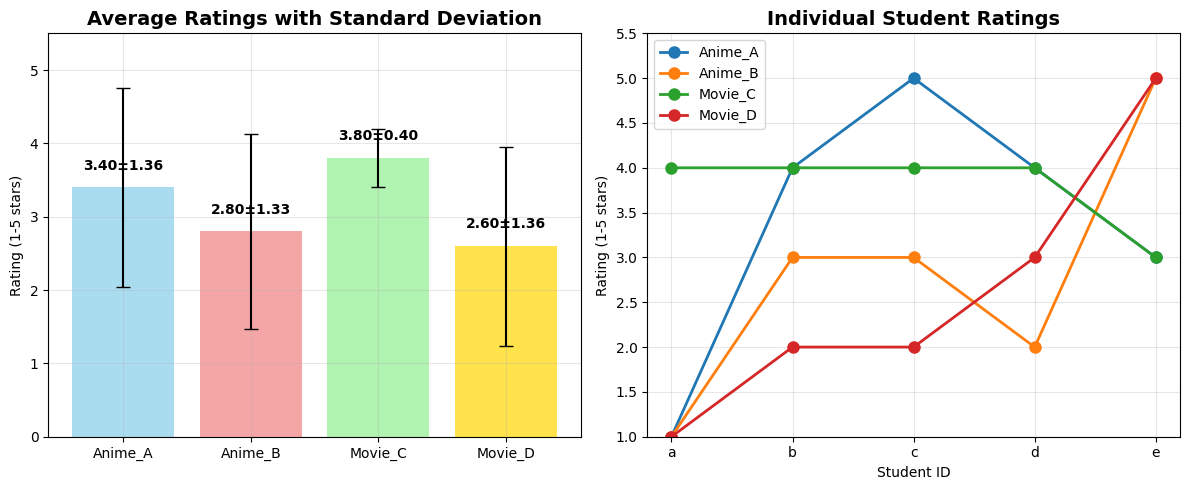

🔍 CORRELATION ANALYSIS
Let's check if students who like Anime A also like Movie C
(Action vs Comedy correlation example)

Correlation Matrix:
         Anime_A  Anime_B  Movie_C  Movie_D
Anime_A    1.000    0.378    0.147    0.196
Anime_B    0.378    1.000   -0.829    0.845
Movie_C    0.147   -0.829    1.000   -0.885
Movie_D    0.196    0.845   -0.885    1.000

Specific Correlation Examples:
Anime A vs Anime B: 0.378 (Similar genres)
Anime A vs Movie C: 0.147 (Different genres)
Anime A vs Movie D: 0.196 (Different genres)


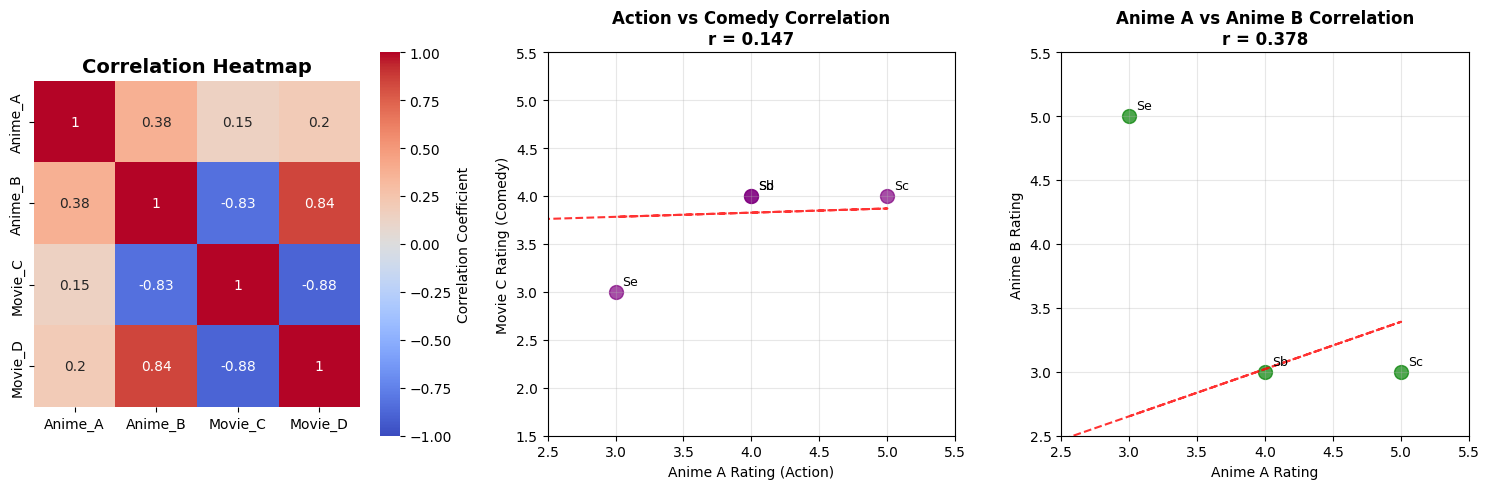


💡 INTERPRETATION & INSIGHTS

📈 CORRELATION INTERPRETATION:
• +1.0: Perfect positive correlation (if one is high, other is high)
•  0.0: No correlation
• -1.0: Perfect negative correlation (if one is high, other is low)
• +0.7 to +1.0: Strong positive correlation
• +0.3 to +0.7: Moderate positive correlation
•  0.0 to +0.3: Weak or no correlation

🎯 OUR FINDINGS:
Anime A vs Anime B: r = 0.378
  → Moderate positive correlation

Anime A vs Movie C: r = 0.147
  → Weak correlation! Liking action doesn't predict comedy preferences

Anime A vs Movie D: r = 0.196
  → Weak correlation

🤖 MACHINE LEARNING CONNECTION:
• Recommendation systems use correlations like these!
• If Anime A & Anime B are strongly correlated, we can recommend Anime B
  to users who liked Anime A
• Weak correlations mean preferences don't transfer across genres

📊 ADDITIONAL STATISTICS
Overall Dataset Statistics:
       Anime_A  Anime_B  Movie_C  Movie_D
count     5.00     5.00     5.00     5.00
mean      3.40     2.80  

In [4]:
# -*- coding: utf-8 -*-
"""Movie Ratings Analysis - Mean, Standard Deviation, Correlation.ipynb

Automatically generated by Colab.
"""

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 2: Create the dataset
data = {
    'Student': ["a","b" ,"c" ,"d" ,"e" ],
    'Anime_A': [1,4 ,5 ,4 ,3 ],
    'Anime_B': [1,3 ,3 ,2 ,5 ],
    'Movie_C': [4,4 ,4 ,4 ,3 ],
    'Movie_D': [1,2 ,2 ,3 ,5 ]
}

df = pd.DataFrame(data)
print("🎬 MOVIE RATINGS DATASET")
print("=" * 50)
print(df.to_string(index=False))
print("\n")

# Step 3: Calculate Mean and Standard Deviation for each title
print("📊 BASIC STATISTICS")
print("=" * 50)

titles = ['Anime_A', 'Anime_B', 'Movie_C', 'Movie_D']
stats_summary = []

for title in titles:
    mean_rating = np.mean(df[title])
    std_rating = np.std(df[title])
    stats_summary.append({
        'Title': title,
        'Mean': mean_rating,
        'Std_Dev': std_rating
    })

    print(f"{title}:")
    print(f"  Average Rating: {mean_rating:.2f} stars")
    print(f"  Standard Deviation: {std_rating:.2f}")
    print(f"  Interpretation: Ratings vary by ±{std_rating:.2f} stars from average")
    print()

# Create a DataFrame for statistics
stats_df = pd.DataFrame(stats_summary)

# Step 4: Visualize Mean Ratings with Standard Deviation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(stats_df['Title'], stats_df['Mean'],
        yerr=stats_df['Std_Dev'],
        capsize=5,
        color=['skyblue', 'lightcoral', 'lightgreen', 'gold'],
        alpha=0.7)
plt.title('Average Ratings with Standard Deviation', fontsize=14, fontweight='bold')
plt.ylabel('Rating (1-5 stars)')
plt.ylim(0, 5.5)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (mean, std) in enumerate(zip(stats_df['Mean'], stats_df['Std_Dev'])):
    plt.text(i, mean + 0.2, f'{mean:.2f}±{std:.2f}',
             ha='center', va='bottom', fontweight='bold')

# Step 5: Individual ratings distribution
plt.subplot(1, 2, 2)
for title in titles:
    plt.plot(df['Student'], df[title], marker='o', linewidth=2, markersize=8, label=title)

plt.title('Individual Student Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Student ID')
plt.ylabel('Rating (1-5 stars)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df['Student'])
plt.ylim(1, 5.5)

plt.tight_layout()
plt.show()

# Step 6: Correlation Analysis
print("🔍 CORRELATION ANALYSIS")
print("=" * 50)
print("Let's check if students who like Anime A also like Movie C")
print("(Action vs Comedy correlation example)\n")

# Calculate correlation matrix
correlation_matrix = df[['Anime_A', 'Anime_B', 'Movie_C', 'Movie_D']].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))
print()

# Specific correlation between Anime A and Movie C (example: action vs comedy)
corr_AB, p_value_AB = stats.pearsonr(df['Anime_A'], df['Anime_B'])
corr_AC, p_value_AC = stats.pearsonr(df['Anime_A'], df['Movie_C'])
corr_AD, p_value_AD = stats.pearsonr(df['Anime_A'], df['Movie_D'])

print("Specific Correlation Examples:")
print(f"Anime A vs Anime B: {corr_AB:.3f} (Similar genres)")
print(f"Anime A vs Movie C: {corr_AC:.3f} (Different genres)")
print(f"Anime A vs Movie D: {corr_AD:.3f} (Different genres)")

# Step 7: Correlation Visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')

# Subplot 2: Anime A vs Movie C scatter plot
plt.subplot(1, 3, 2)
plt.scatter(df['Anime_A'], df['Movie_C'], s=100, alpha=0.7, color='purple')

# Add student labels
for i, student in enumerate(df['Student']):
    plt.annotate(f'S{student}', (df['Anime_A'][i], df['Movie_C'][i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Anime A Rating (Action)')
plt.ylabel('Movie C Rating (Comedy)')
plt.title(f'Action vs Comedy Correlation\nr = {corr_AC:.3f}', fontweight='bold')
plt.xlim(2.5, 5.5)
plt.ylim(1.5, 5.5)
plt.grid(True, alpha=0.3)

# Add trendline
z = np.polyfit(df['Anime_A'], df['Movie_C'], 1)
p = np.poly1d(z)
plt.plot(df['Anime_A'], p(df['Anime_A']), "r--", alpha=0.8)

# Subplot 3: Anime A vs Anime B scatter plot
plt.subplot(1, 3, 3)
plt.scatter(df['Anime_A'], df['Anime_B'], s=100, alpha=0.7, color='green')

# Add student labels
for i, student in enumerate(df['Student']):
    plt.annotate(f'S{student}', (df['Anime_A'][i], df['Anime_B'][i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Anime A Rating')
plt.ylabel('Anime B Rating')
plt.title(f'Anime A vs Anime B Correlation\nr = {corr_AB:.3f}', fontweight='bold')
plt.xlim(2.5, 5.5)
plt.ylim(2.5, 5.5)
plt.grid(True, alpha=0.3)

# Add trendline
z2 = np.polyfit(df['Anime_A'], df['Anime_B'], 1)
p2 = np.poly1d(z2)
plt.plot(df['Anime_A'], p2(df['Anime_A']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Step 8: Interpretation and Insights
print("\n💡 INTERPRETATION & INSIGHTS")
print("=" * 50)

print("\n📈 CORRELATION INTERPRETATION:")
print("• +1.0: Perfect positive correlation (if one is high, other is high)")
print("•  0.0: No correlation")
print("• -1.0: Perfect negative correlation (if one is high, other is low)")
print("• +0.7 to +1.0: Strong positive correlation")
print("• +0.3 to +0.7: Moderate positive correlation")
print("•  0.0 to +0.3: Weak or no correlation")

print(f"\n🎯 OUR FINDINGS:")
print(f"Anime A vs Anime B: r = {corr_AB:.3f}")
if corr_AB > 0.7:
    print("  → Strong positive correlation! Students who like Anime A also like Anime B")
elif corr_AB > 0.3:
    print("  → Moderate positive correlation")
else:
    print("  → Weak or no correlation")

print(f"\nAnime A vs Movie C: r = {corr_AC:.3f}")
if abs(corr_AC) < 0.3:
    print("  → Weak correlation! Liking action doesn't predict comedy preferences")
elif corr_AC > 0:
    print("  → Some positive relationship")
else:
    print("  → Negative relationship")

print(f"\nAnime A vs Movie D: r = {corr_AD:.3f}")
if abs(corr_AD) < 0.3:
    print("  → Weak correlation")

print("\n🤖 MACHINE LEARNING CONNECTION:")
print("• Recommendation systems use correlations like these!")
print("• If Anime A & Anime B are strongly correlated, we can recommend Anime B")
print("  to users who liked Anime A")
print("• Weak correlations mean preferences don't transfer across genres")

# Step 9: Additional Statistics
print("\n📊 ADDITIONAL STATISTICS")
print("=" * 50)
print("Overall Dataset Statistics:")
print(df[titles].describe().round(2))